In [2]:
import numpy as np
import pandas as pd

from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
import joblib
from joblib import Parallel, delayed, parallel_backend
import multiprocessing
from multiprocessing import Value
from tqdm.auto import tqdm


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import shap



In [3]:
def name_columns(df):
    column_names = ['ecg_cleaned_mean_p1', 'rr_signal_mean_p1', 'bvp_cleaned_mean_p1', 'gsr_cleaned_mean_p1', 'gsr_tonic_mean_p1', 'gsr_phasic_mean_p1', 'gsr_SMNA_mean_p1', 'rsp_cleaned_mean_p1', 'resp_rate_mean_p1', 'emg_zygo_cleaned_mean_p1', 'emg_coru_cleaned_mean_p1', 'emg_trap_cleaned_mean_p1', 'skt_filtered_mean_p1',
    'ecg_cleaned_min_p1', 'rr_signal_min_p1', 'bvp_cleaned_min_p1', 'gsr_cleaned_min_p1', 'gsr_tonic_min_p1', 'gsr_phasic_min_p1', 'gsr_SMNA_min_p1', 'rsp_cleaned_min_p1', 'resp_rate_min_p1', 'emg_zygo_cleaned_min_p1', 'emg_coru_cleaned_min_p1', 'emg_trap_cleaned_min_p1', 'skt_filtered_min_p1',

    'ecg_cleaned_mean_p2', 'rr_signal_mean_p2', 'bvp_cleaned_mean_p2', 'gsr_cleaned_mean_p2', 'gsr_tonic_mean_p2', 'gsr_phasic_mean_p2', 'gsr_SMNA_mean_p2', 'rsp_cleaned_mean_p2', 'resp_rate_mean_p2', 'emg_zygo_cleaned_mean_p2', 'emg_coru_cleaned_mean_p2', 'emg_trap_cleaned_mean_p2', 'skt_filtered_mean_p2',
    'ecg_cleaned_min_p2', 'rr_signal_min_p2', 'bvp_cleaned_min_p2', 'gsr_cleaned_min_p2', 'gsr_tonic_min_p2', 'gsr_phasic_min_p2', 'gsr_SMNA_min_p2', 'rsp_cleaned_min_p2', 'resp_rate_min_p2', 'emg_zygo_cleaned_min_p2', 'emg_coru_cleaned_min_p2', 'emg_trap_cleaned_min_p2', 'skt_filtered_min_p2',

    'ecg_cleaned_mean_p3', 'rr_signal_mean_p3', 'bvp_cleaned_mean_p3', 'gsr_cleaned_mean_p3', 'gsr_tonic_mean_p3', 'gsr_phasic_mean_p3', 'gsr_SMNA_mean_p3', 'rsp_cleaned_mean_p3', 'resp_rate_mean_p3', 'emg_zygo_cleaned_mean_p3', 'emg_coru_cleaned_mean_p3', 'emg_trap_cleaned_mean_p3', 'skt_filtered_mean_p3',
    'ecg_cleaned_min_p3', 'rr_signal_min_p3', 'bvp_cleaned_min_p3', 'gsr_cleaned_min_p3', 'gsr_tonic_min_p3', 'gsr_phasic_min_p3', 'gsr_SMNA_min_p3', 'rsp_cleaned_min_p3', 'resp_rate_min_p3', 'emg_zygo_cleaned_min_p3', 'emg_coru_cleaned_min_p3', 'emg_trap_cleaned_min_p3', 'skt_filtered_min_p3']

    # Split the column names into the desired levels
    split_columns = [col.split('_') for col in column_names]

    # Organize the levels and construct a MultiIndex
    levels = [
        [col[0] for col in split_columns],
        ['_'.join(col[1:-2]) for col in split_columns],
        [col[-2] for col in split_columns],
        [col[-1] for col in split_columns],

    ]

    multiindex = pd.MultiIndex.from_arrays(levels, names=['signal', 'preprocess', 'aggregation', 'partition'])
    
    df.columns = multiindex
    return df


# df_importances = pd.DataFrame(all_importances, )
# df_shap_values = pd.DataFrame(all_shap_values)

df_importances = pd.read_csv('feature_importances.csv', index_col=0)

df_importances = name_columns(df_importances)

# df_shap_values = name_columns(df_shap_values)

# df_importances.to_csv('feature_importances.csv')
# df_shap_values.to_csv('shap_values.csv')


display(df_importances)
# display(df_shap_values)



signal                ecg        rr           bvp       gsr            \
preprocess        cleaned    signal       cleaned   cleaned     tonic   
aggregation          mean      mean          mean      mean      mean   
partition              p1        p1            p1        p1        p1   
0            5.425671e-05  0.000010  5.602258e-06  0.953920  0.000076   
1            3.949405e-06  0.000461  2.152417e-06  0.280366  0.232306   
2            0.000000e+00  0.000000  0.000000e+00  0.000000  0.000000   
3            1.324223e-05  0.000050  5.919793e-07  0.000097  0.006218   
4            6.250670e-06  0.045377  1.307380e-05  0.013649  0.025367   
5            4.499995e-05  0.019731  1.555512e-04  0.071336  0.069615   
6            1.239343e-05  0.000872  9.665080e-06  0.000483  0.000335   
7            4.103639e-05  0.000692  1.277089e-05  0.001059  0.001484   
8            4.022811e-06  0.011446  3.032750e-05  0.195860  0.002087   
9            1.102767e-05  0.002154  7.053723e-06  0.033637  0.042767   
10           3.665670e-06  0.000252  2.049875e-06  0.001774  0.010773   
11           3.664279e-06  0.000322  1.291138e-05  0.276701  0.227976   
12           1.943036e-05  0.000394  1.471380e-05  0.291466  0.027932   
13           2.092806e-06  0.000006  7.235359e-06  0.000077  0.000136   
14           4.028187e-06  0.000085  1.623705e-06  0.246381  0.201334   
15           4.529014e-06  0.000019  1.983885e-06  0.341613  0.206175   
16           1.047852e-05  0.002079  1.110633e-05  0.001109  0.000981   
17           3.385819e-05  0.001906  2.569459e-03  0.126681  0.124856   
18           2.114215e-06  0.000149  4.695702e-06  0.060834  0.040294   
19           1.204232e-05  0.813599  4.477441e-05  0.007942  0.011315   
20           1.370779e-05  0.044911  4.727681e-05  0.028924  0.015608   
21           2.026879e-06  0.004571  4.832642e-06  0.000393  0.000454   
22           5.092826e-05  0.009592  2.141626e-04  0.000133  0.000429   
23           3.100578e-06  0.000008  1.033127e-05  0.001047  0.000011   
24           5.109307e-06  0.005402  8.041130e-06  0.003874  0.003745   
25           3.436549e-06  0.000056  4.459276e-06  0.017393  0.023666   
26           2.632184e-06  0.000062  3.882877e-06  0.350240  0.369692   
27           3.481912e-07  0.000101  8.534830e-07  0.195779  0.119479   
28           1.248658e-05  0.001069  1.044937e-05  0.001503  0.016278   
29           8.355962e-05  0.003373  1.012830e-03  0.009843  0.007398   

signal                                rsp      resp           emg  ...  \
preprocess     phasic      SMNA   cleaned      rate  zygo_cleaned  ...   
aggregation      mean      mean      mean      mean          mean  ...   
partition          p1        p1        p1        p1            p1  ...   
0            0.000023  0.000020  0.000013  0.004414  2.122045e-06  ...   
1            0.000560  0.000012  0.000018  0.000025  6.404611e-07  ...   
2            0.000000  0.000000  0.000000  0.000000  0.000000e+00  ...   
3            0.000047  0.000032  0.000047  0.000089  1.893985e-07  ...   
4            0.000697  0.000426  0.000123  0.000583  1.313058e-06  ...   
5            0.020337  0.023809  0.001574  0.000732  1.906346e-05  ...   
6            0.000078  0.000033  0.000056  0.000092  1.178655e-06  ...   
7            0.254411  0.001762  0.000609  0.000484  2.961175e-06  ...   
8            0.000269  0.001377  0.001560  0.021824  1.603254e-05  ...   
9            0.001564  0.002907  0.003142  0.001201  1.925039e-06  ...   
10           0.000224  0.004295  0.000678  0.005317  2.770843e-07  ...   
11           0.000213  0.000008  0.000727  0.000482  1.279031e-06  ...   
12           0.000553  0.000720  0.000304  0.000609  1.112627e-06  ...   
13           0.000004  0.000007  0.000001  0.000024  1.125162e-06  ...   
14           0.034696  0.000040  0.000066  0.001401  5.468095e-06  ...   
15           0.000068  0.000068  0.000039  0.000147  8.039520e-07  ...   
16           0.022364  0.000122  0.00

Passing `palette` without assigning `hue` is deprecated.
Passing `palette` without assigning `hue` is deprecated.
Passing `palette` without assigning `hue` is deprecated.


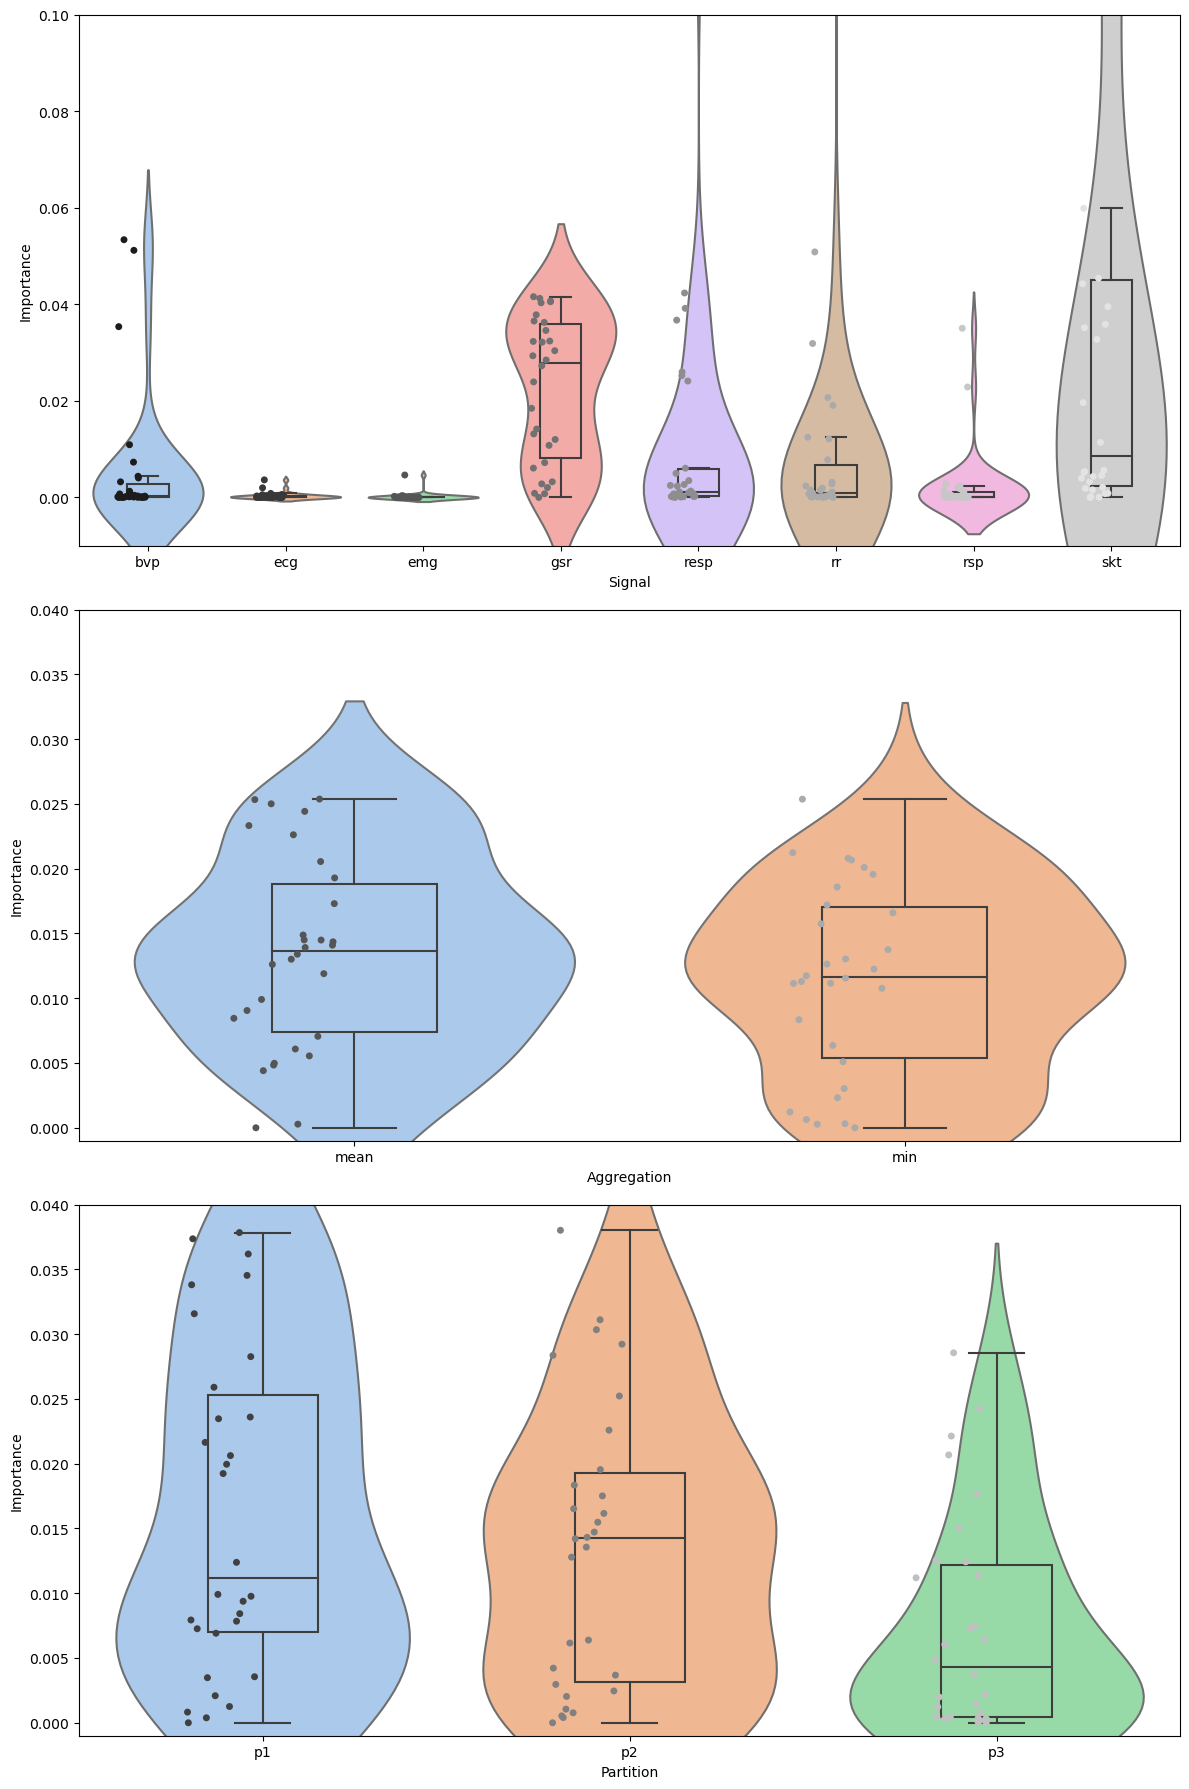

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Group and aggregate the importances by the desired levels
grouped_by_signal = df_importances.groupby(level='signal', axis=1).mean()
grouped_by_aggregation = df_importances.groupby(level='aggregation', axis=1).mean()
grouped_by_partition = df_importances.groupby(level='partition', axis=1).mean()

# Melt the DataFrames for seaborn
grouped_by_signal_melt = grouped_by_signal.melt(var_name="Signal", value_name="Importance")
grouped_by_aggregation_melt = grouped_by_aggregation.melt(var_name="Aggregation", value_name="Importance")
grouped_by_partition_melt = grouped_by_partition.melt(var_name="Partition", value_name="Importance")


fig, axes = plt.subplots(3, 1, figsize=(12, 18))
palette = sns.color_palette("pastel")

box_alpha = 0.7

def plot_half_violin_box_strip(data, x, y, ax):
    sns.violinplot(y=y, x=x, data=data, palette=palette, scale="width", inner=None, ax=ax)
    ylim = ax.get_ylim()

    sns.boxplot(y=y, x=x, data=data, saturation=1, showfliers=False, width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(y=y, x=x, data=data, palette = 'gray', ax=ax)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([-0.12, 0]))
    ax.set_ylim(ylim)
    
plot_half_violin_box_strip(grouped_by_signal_melt, "Signal", "Importance", axes[0])
# axes[0].set_title("Aggregated Importances by Signal")

plot_half_violin_box_strip(grouped_by_aggregation_melt, "Aggregation", "Importance", axes[1])
# axes[1].set_title("Aggregated Importances by Aggregation")

plot_half_violin_box_strip(grouped_by_partition_melt, "Partition", "Importance", axes[2])
# axes[2].set_title("Aggregated Importances by Partition")


# Set y-axis limits to crop extreme points
y_min, y_max = -0.01, 0.2  # Adjust these values based on the desired range
axes[0].set_ylim(-0.01, 0.1 )
axes[1].set_ylim(-0.001, 0.04 )
axes[2].set_ylim(-0.001, 0.04 )

plt.tight_layout()
plt.show()


In [21]:
add_asterisks_anova(axes[0], grouped_by_signal_melt, signal_labels, "Signal", "Importance", 0.095)

nan nan


at least one input has length 0


ANOVA Table:    Source        SS   DF        MS        F         p-unc       np2
0  Signal  0.038903    7  0.005558  9.54536  2.048545e-10  0.223606
1  Within  0.135076  232  0.000582      NaN           NaN       NaN
ANOVA Table:       Source        SS  DF        MS         F     p-unc       np2
0  Partition  0.001227   2  0.000614  5.279791  0.006852  0.108237
1     Within  0.010113  87  0.000116       NaN       NaN       NaN


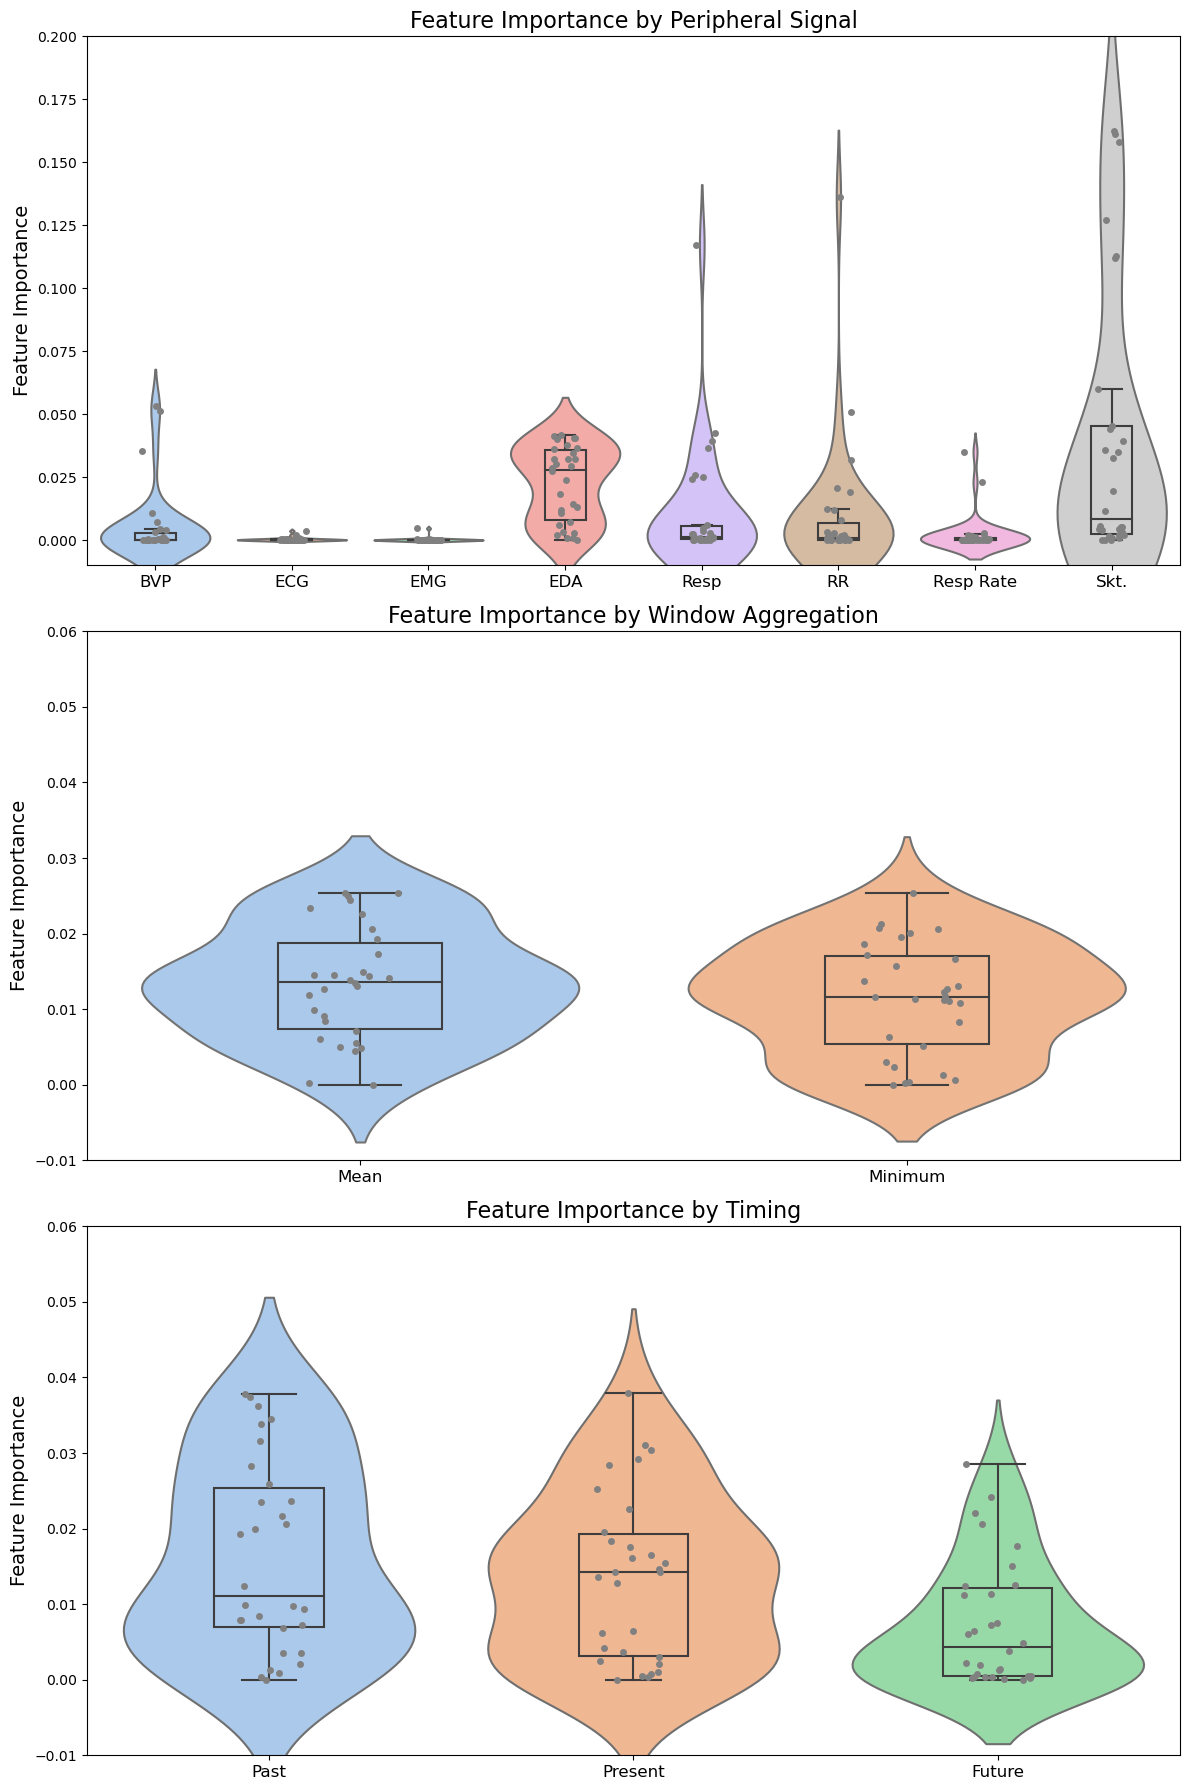

In [8]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind

# Group and aggregate the importances by the desired levels
grouped_by_signal = df_importances.groupby(level='signal', axis=1).mean()
grouped_by_aggregation = df_importances.groupby(level='aggregation', axis=1).mean()
grouped_by_partition = df_importances.groupby(level='partition', axis=1).mean()

# Melt the DataFrames for seaborn
grouped_by_signal_melt = grouped_by_signal.melt(var_name="Signal", value_name="Importance")
grouped_by_aggregation_melt = grouped_by_aggregation.melt(var_name="Aggregation", value_name="Importance")
grouped_by_partition_melt = grouped_by_partition.melt(var_name="Partition", value_name="Importance")

import pingouin as pg

def add_asterisks_anova(ax, data, labels, x_col, y_col, y_offset, alpha=0.05):
    data = data.dropna(subset=[y_col])
    # print(f"Data: {data.head()}")
    anova_table = pg.anova(data=data, dv=y_col, between=x_col, detailed=True)
    print(f"ANOVA Table: {anova_table}")
    # p_value = anova_table.loc['Signal', "p-unc"]
    
    # if p_value < alpha:
    #     ax.text(len(labels) / 2, y_offset, "*", ha='center', va='bottom')

    # return p_value  # Add this line to return the p-value


def add_asterisks_ttest(ax, data, labels, x_col, y_col, y_offset, alpha=0.05):
    data = data.dropna(subset=[y_col])
    p_values = []

    for i in range(len(labels) - 1):
        group1 = data[data[x_col] == labels[i]][y_col].dropna()
        group2 = data[data[x_col] == labels[i + 1]][y_col].dropna()
        ttest_result = pg.ttest(group1, group2)
        p_value = ttest_result.at['T-test', 'p-val']
    #     p_values.append(p_value)

    #     if p_value < alpha:
    #         ax.text(i + 0.5, y_offset, "*", ha='center', va='bottom')

    # return p_values




fig, axes = plt.subplots(3, 1, figsize=(12, 18))
palette = sns.color_palette("pastel")

box_alpha = 0.7

# Set labels
signal_labels = ["BVP", "ECG", "EMG", "EDA", "Resp", "RR", "Resp Rate", "Skt."]
aggregation_labels = ["Mean", "Minimum"]
partition_labels = ["Past", "Present", "Future"]

def plot_half_violin_box_strip(data, x, y, ax):
    sns.violinplot(y=y, x=x, data=data, palette=palette, scale="width", inner=None, ax=ax)
    ylim = ax.get_ylim()

    sns.boxplot(y=y, x=x, data=data, saturation=1, showfliers=False, width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(y=y, x=x, data=data, color = 'gray', ax=ax)
    # for dots in ax.collections[old_len_collections:]:
    #     dots.set_offsets(dots.get_offsets() + np.array([-0.12, 0]))
    ax.set_ylim(ylim)

plot_half_violin_box_strip(grouped_by_signal_melt, "Signal", "Importance", axes[0])
axes[0].set_title("Feature Importance by Peripheral Signal", fontsize=16)
axes[0].set_xticklabels(signal_labels, fontsize=12)
axes[0].set_xlabel("")
axes[0].set_ylabel("Feature Importance", fontsize=14)
add_asterisks_anova(axes[0], grouped_by_signal_melt, signal_labels, "Signal", "Importance", 0.095)



plot_half_violin_box_strip(grouped_by_aggregation_melt, "Aggregation", "Importance", axes[1])
axes[1].set_title("Feature Importance by Window Aggregation", fontsize=16)
axes[1].set_xticklabels(aggregation_labels, fontsize=12)
axes[1].set_xlabel("")
axes[1].set_ylabel("Feature Importance", fontsize=14)
# add_asterisks_ttest(axes[1], grouped_by_aggregation_melt, aggregation_labels, "Aggregation", "Importance", 0.038)


plot_half_violin_box_strip(grouped_by_partition_melt, "Partition", "Importance", axes[2])
axes[2].set_title("Feature Importance by Timing", fontsize=16)
axes[2].set_xticklabels(partition_labels, fontsize=12)
axes[2].set_xlabel("")
axes[2].set_ylabel("Feature Importance", fontsize=14)
add_asterisks_anova(axes[2], grouped_by_partition_melt, partition_labels, "Partition", "Importance", 0.05)

# Set y-axis limits to crop extreme points
y_min, y_max = -0.01, 0.2  # Adjust these values based on the desired range
axes[0].set_ylim(-0.01, 0.2)
axes[1].set_ylim(-0.01, 0.06)
axes[2].set_ylim(-0.01, 0.06)

plt.tight_layout()
plt.show()

